<div style="text-align: center;">
  <span style="color:#809bd8; font-size: 24px; font-weight: bold;">Institución Universitaria Digital de Antioquia</span>
  <br>
  <img src="https://imgur.com/KUMa2uy.png" alt="DataFrame frutas" style="max-width: 20%; height: auto;">
</div>

---
**<span style="color:#809bd8">Evidencia de Aprendizaje:</span>** F40 - EA4. Taller práctico: analizando los datos en mapas

**<span style="color:#809bd8">Asignatura:</span>** Visualización de toma de decisiones

**<span style="color:#809bd8">Estudiante:</span>** Jean Carlos Páez Ramírez

**<span style="color:#809bd8">Grupo:</span>** PREICA2501B020124

**<span style="color:#809bd8">Docente:</span>** Andrés Felipe Palacio Angel (Especialista en Big Data del IUD)

**<span style="color:#809bd8">Fecha:</span>** 10 de junio de 2025

In [1]:
# 1. Cargar librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
# 2. Cargar el dataset desde el archivo CSV
from google.colab import files
uploaded = files.upload()

Saving Anexo EA4_Tourist_Travel_Europe.csv to Anexo EA4_Tourist_Travel_Europe (3).csv


In [3]:
# 2.1 Cargar el dataset desde el archivo CSV
df = pd.read_csv('/content/Anexo EA4_Tourist_Travel_Europe.csv')

In [4]:
# 3. Primer vistazo a los datos
print("=== ANÁLISIS EXPLORATORIO ===")
print(df.head())
print("\n=== INFORMACIÓN DEL DATASET ===")
print(df.info())
print("\n=== ESTADÍSTICAS DESCRIPTIVAS ===")
print(df.describe())

=== ANÁLISIS EXPLORATORIO ===
   Tourist_ID Country_Visited  City_Visited Mode_of_Travel  \
0           1         Germany       Hamburg         Flight   
1           2         Germany        Berlin            Car   
2           3              UK    Manchester        Bicycle   
3           4          Greece  Thessaloniki        Bicycle   
4           5          Greece  Thessaloniki         Flight   

   Travel_Duration_Days  Number_of_Companions  Total_Travel_Cost  \
0                     8                     4               1060   
1                    16                     3               3972   
2                     8                     2                666   
3                    12                     3               3644   
4                     5                     3               1885   

  Accommodation_Type  Main_Purpose Season_of_Visit  
0              Hotel  Family Visit          Summer  
1             Hostel  Family Visit          Winter  
2            Camping      Bus

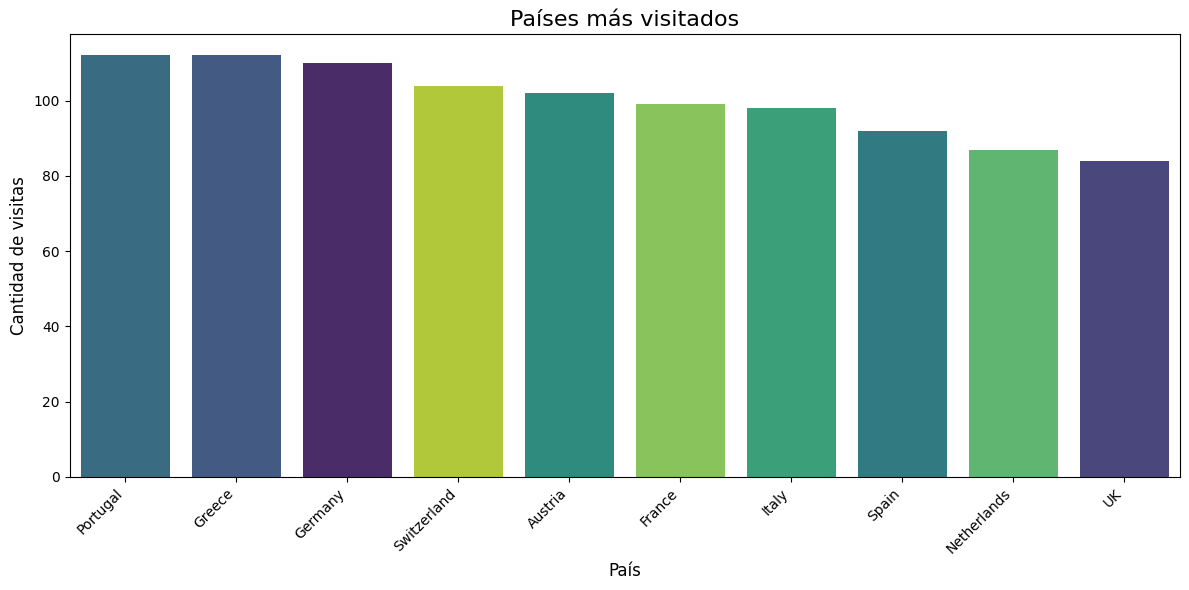

In [5]:
# 4. Gráfica 1: Países más visitados
plt.figure(figsize=(12, 6))
sns.countplot(
    data=df,
    x='Country_Visited',
    hue='Country_Visited',
    order=df['Country_Visited'].value_counts().index,
    palette='viridis',
    legend=False
)
plt.title('Países más visitados', fontsize=16)
plt.xlabel('País', fontsize=12)
plt.ylabel('Cantidad de visitas', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
# Explicación: Muestra la popularidad de cada país como destino turístico, permitiendo identificar los destinos más demandados.
# Los países más visitados son Portugal y Grecia (112 visitas cada uno), seguidos muy de cerca por Alemania (110) y Suiza (104). El país menos visitado es Reino Unido (84). Esto indica una preferencia por destinos del sur y centro de Europa.

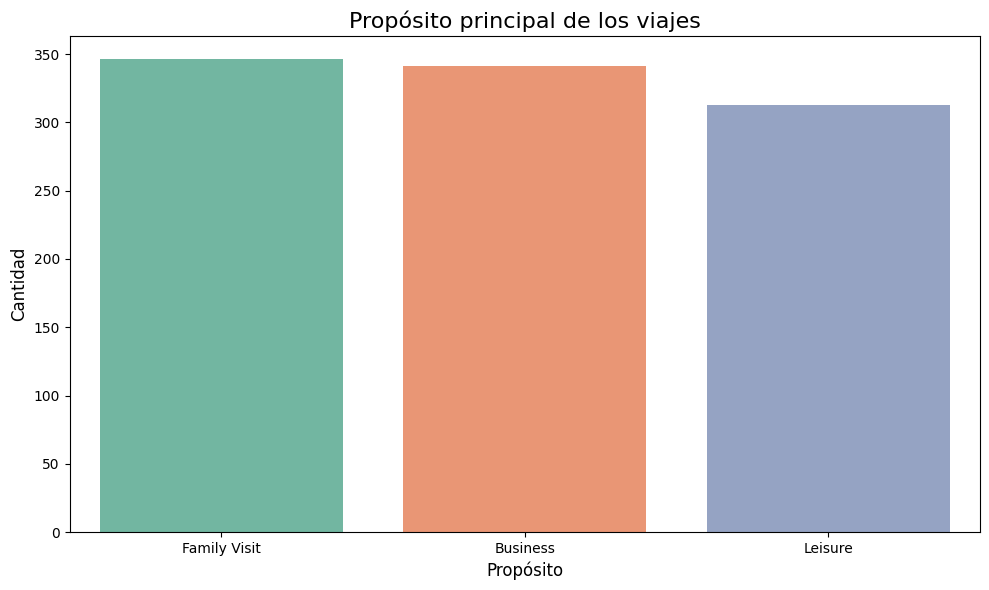

In [6]:
# 5. Gráfica 2: Propósito principal de los viajes
plt.figure(figsize=(10, 6))
sns.countplot(
    data=df,
    x='Main_Purpose',
    hue='Main_Purpose',
    palette='Set2',
    legend=False
)
plt.title('Propósito principal de los viajes', fontsize=16)
plt.xlabel('Propósito', fontsize=12)
plt.ylabel('Cantidad', fontsize=12)
plt.tight_layout()
plt.show()
# Explicación: Indica si los viajes son principalmente por ocio, negocios o visitas familiares, ayudando a entender el perfil del turista.
# El propósito más frecuente es Family Visit (visita familiar) con 346 viajes, seguido de Business (negocios) con 341 y Leisure (ocio) con 313. Hay un equilibrio notable entre los tres motivos, aunque las visitas familiares son ligeramente más comunes.

In [7]:
# 6. Crear coordenadas para todas las ciudades del dataset
city_coordinates = {
    ('Hamburg', 'Germany'): (53.5511, 9.9937),
    ('Berlin', 'Germany'): (52.5200, 13.4050),
    ('Munich', 'Germany'): (48.1351, 11.5820),
    ('Manchester', 'UK'): (53.4808, -2.2426),
    ('London', 'UK'): (51.5074, -0.1278),
    ('Edinburgh', 'UK'): (55.9533, -3.1883),
    ('Thessaloniki', 'Greece'): (40.6401, 22.9444),
    ('Athens', 'Greece'): (37.9755, 23.7348),
    ('Santorini', 'Greece'): (36.3932, 25.4615),
    ('Lisbon', 'Portugal'): (38.7223, -9.1393),
    ('Faro', 'Portugal'): (37.0194, -7.9322),
    ('Porto', 'Portugal'): (41.1579, -8.6291),
    ('Madrid', 'Spain'): (40.4168, -3.7038),
    ('Barcelona', 'Spain'): (41.3851, 2.1734),
    ('Seville', 'Spain'): (37.3891, -5.9845),
    ('Rome', 'Italy'): (41.9028, 12.4964),
    ('Milan', 'Italy'): (45.4642, 9.1900),
    ('Venice', 'Italy'): (45.4408, 12.3155),
    ('Paris', 'France'): (48.8566, 2.3522),
    ('Lyon', 'France'): (45.7640, 4.8357),
    ('Nice', 'France'): (43.7102, 7.2620),
    ('Amsterdam', 'Netherlands'): (52.3676, 4.9041),
    ('Rotterdam', 'Netherlands'): (51.9244, 4.4777),
    ('Utrecht', 'Netherlands'): (52.0907, 5.1214),
    ('Vienna', 'Austria'): (48.2082, 16.3738),
    ('Salzburg', 'Austria'): (47.8095, 13.0550),
    ('Innsbruck', 'Austria'): (47.2692, 11.4041),
    ('Zurich', 'Switzerland'): (47.3769, 8.5417),
    ('Geneva', 'Switzerland'): (46.2044, 6.1432),
    ('Lucerne', 'Switzerland'): (47.0502, 8.3093)
}

# Crear DataFrame con coordenadas
city_coords_data = []
for (city, country), (lat, lon) in city_coordinates.items():
    city_coords_data.append({
        'City_Visited': city,
        'Country_Visited': country,
        'lat': lat,
        'lon': lon
    })

city_coords_df = pd.DataFrame(city_coords_data)

In [52]:
# 7. MAPA 1: Mapa coroplético de países más visitados
print("\n=== CREANDO MAPAS INTERACTIVOS ===")

country_counts = df['Country_Visited'].value_counts().reset_index()
country_counts.columns = ['Country_Visited', 'Count']

fig1 = px.choropleth(
    country_counts,
    locations="Country_Visited",
    locationmode="country names",
    color="Count",
    hover_name="Country_Visited",
    color_continuous_scale="Viridis",
    title="Mapa coroplético: Países más visitados en Europa",
    height=900,
    width=1600,
    projection="natural earth"

)
fig1.update_layout(title_x=0.5)
fig1.update_geos(scope='europe')
fig1.show()
# Explicación: Mapa coroplético que muestra la intensidad de visitas por país europeo, permitiendo identificar visualmente los destinos más populares.
# El mapa muestra que Portugal y Grecia son los países con mayor afluencia de turistas en el dataset, seguidos por Alemania y Suiza. El Reino Unido y los Países Bajos tienen menor cantidad de visitas.


=== CREANDO MAPAS INTERACTIVOS ===


In [46]:
# 8. MAPA 2: Mapa de burbujas por ciudad visitada
city_counts = df['City_Visited'].value_counts().reset_index()
city_counts.columns = ['City_Visited', 'Count']

# Agregar información del país para cada ciudad
city_country = df[['City_Visited', 'Country_Visited']].drop_duplicates()
city_counts = city_counts.merge(city_country, on='City_Visited', how='left')

# Agregar coordenadas
city_counts = city_counts.merge(city_coords_df, on=['City_Visited', 'Country_Visited'], how='left')

fig2 = px.scatter_geo(
    city_counts,
    lat='lat',
    lon='lon',
    hover_name='City_Visited',
    size='Count',
    color='Country_Visited',
    title='Mapa de burbujas: Ciudades más visitadas',
    size_max=10,
    height=900,
    width=1600,
    projection="natural earth"
)
fig2.update_layout(title_x=0.5)
fig2.update_geos(scope='europe')
fig2.show()
# Explicación: Muestra la ubicación geográfica de las ciudades visitadas, con el tamaño de la burbuja representando la cantidad de turistas. Permite identificar focos turísticos urbanos.
# Las ciudades más visitadas son Lisboa y París (44 visitas cada una), seguidas por Salzburgo (41), Hamburgo y Tesalónica (40 cada una). Esto revela que tanto capitales como ciudades turísticas de tamaño medio son destinos populares.

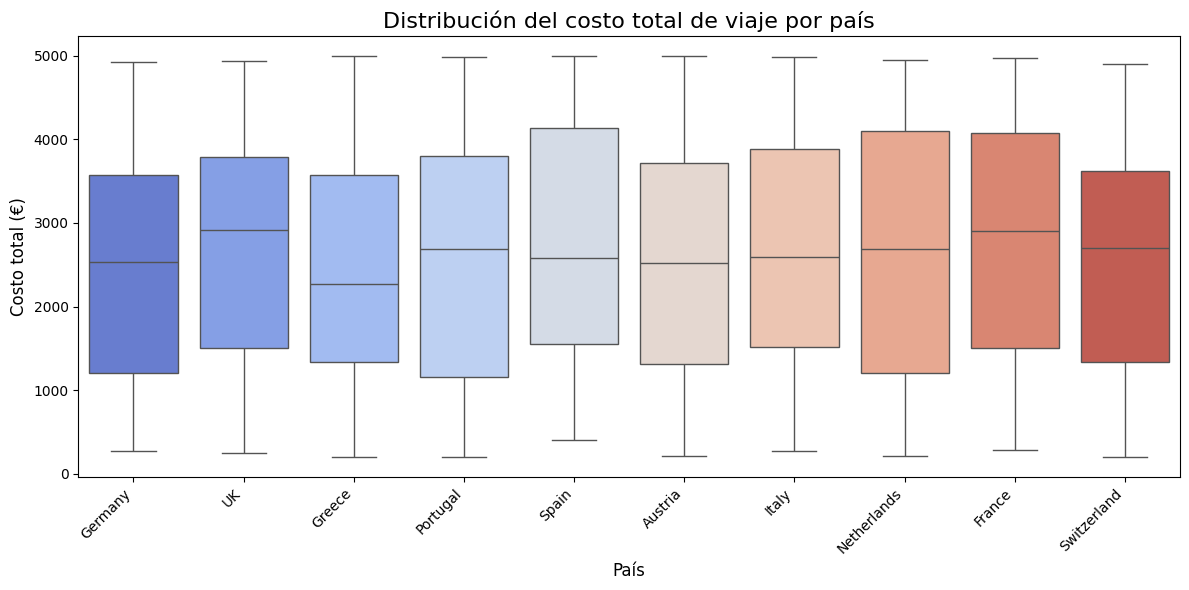

In [10]:
# 9. Gráfica 3: Costo total de viaje por país (boxplot)
plt.figure(figsize=(12, 6))
sns.boxplot(
    data=df,
    x='Country_Visited',
    y='Total_Travel_Cost',
    hue='Country_Visited',
    palette='coolwarm',
    legend=False
)
plt.title('Distribución del costo total de viaje por país', fontsize=16)
plt.xlabel('País', fontsize=12)
plt.ylabel('Costo total (€)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
# Explicación: Compara la distribución de costos de viaje entre diferentes países, mostrando medianas, cuartiles y valores atípicos.
# El costo promedio de viaje varía entre países. Francia, España, Reino Unido y Países Bajos tienen los costos medianos más altos (alrededor de €2,700-2,900),
# mientras que Grecia y Alemania presentan costos medianos más bajos (alrededor de €2,200-2,500). Sin embargo, la dispersión de los datos es alta en todos los países.

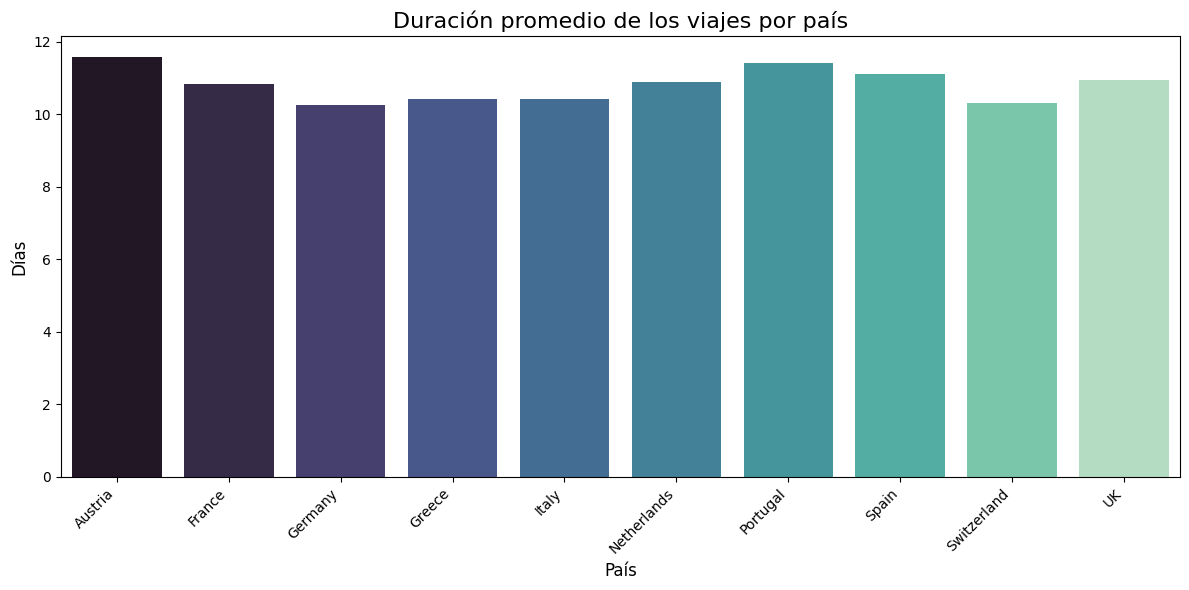

In [11]:
# 10. Gráfica 4: Duración promedio de los viajes por país
avg_duration = df.groupby('Country_Visited')['Travel_Duration_Days'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(
    data=avg_duration,
    x='Country_Visited',
    y='Travel_Duration_Days',
    hue='Country_Visited',
    palette='mako',
    legend=False
)
plt.title('Duración promedio de los viajes por país', fontsize=16)
plt.xlabel('País', fontsize=12)
plt.ylabel('Días', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
# Explicación: Muestra la duración promedio de los viajes en cada país, indicando destinos donde los turistas tienden a quedarse más tiempo.
# Los viajes más largos, en promedio, se realizan a Austria (11.6 días), Portugal (11.4) y España (11.1). Los viajes más cortos son a Alemania (10.3) y Suiza (10.3). La diferencia entre países es pequeña, pero Austria destaca ligeramente.

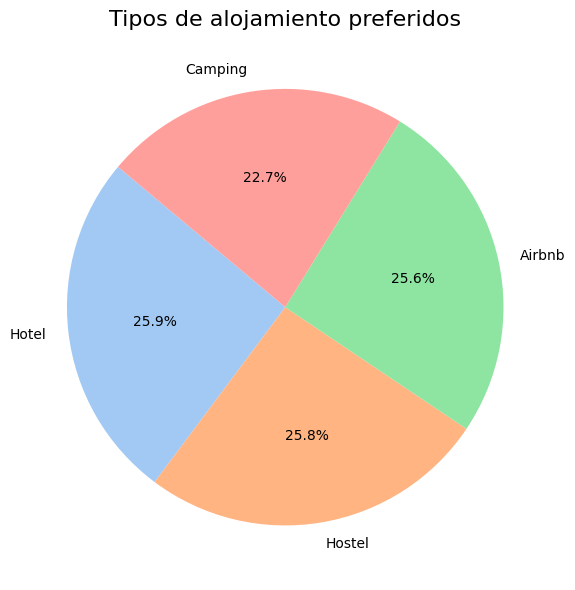

In [12]:
# 11. Gráfica 5: Tipo de alojamiento preferido
plt.figure(figsize=(10, 6))
accommodation_counts = df['Accommodation_Type'].value_counts()
plt.pie(
    accommodation_counts,
    labels=accommodation_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=sns.color_palette('pastel')
)
plt.title('Tipos de alojamiento preferidos', fontsize=16)
plt.tight_layout()
plt.show()
# Explicación: Muestra la proporción de cada tipo de alojamiento utilizado por los turistas, revelando preferencias de hospedaje.
# Las preferencias de alojamiento están muy equilibradas: Hotel (25.9%), Hostel (25.8%), Airbnb (25.6%) y Camping (22.7%). No hay un tipo claramente dominante, lo que sugiere diversidad en las preferencias de los turistas.

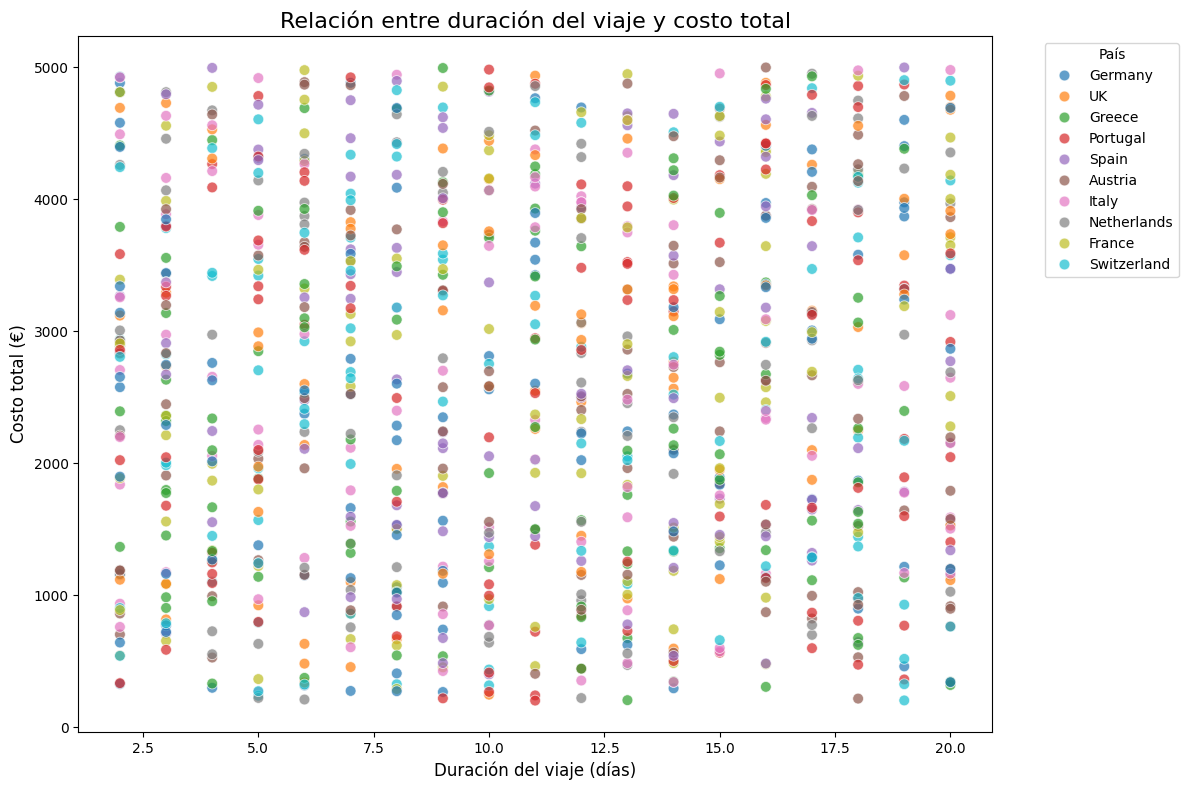

In [13]:
# 12. Gráfica 6: Relación entre duración del viaje y costo total
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=df,
    x='Travel_Duration_Days',
    y='Total_Travel_Cost',
    hue='Country_Visited',
    palette='tab10',
    s=60,
    alpha=0.7
)
plt.title('Relación entre duración del viaje y costo total', fontsize=16)
plt.xlabel('Duración del viaje (días)', fontsize=12)
plt.ylabel('Costo total (€)', fontsize=12)
plt.legend(title='País', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
# Explicación: Explora la correlación entre la duración del viaje y el costo total, diferenciando por país para identificar patrones de gasto.
# La correlación entre la duración del viaje y el costo total es muy baja (0.02), lo que indica que el costo no depende fuertemente de la duración. Hay viajes cortos con alto costo y viajes largos con bajo costo, probablemente por diferencias en destinos y tipos de alojamiento.

In [48]:
# 13. MAPA 3: Mapa por propósito del viaje
purpose_city = df.groupby(['City_Visited', 'Country_Visited', 'Main_Purpose']).size().reset_index(name='Count')
purpose_city = purpose_city.merge(city_coords_df, on=['City_Visited', 'Country_Visited'], how='left')

fig3 = px.scatter_geo(
    purpose_city,
    lat='lat',
    lon='lon',
    color='Main_Purpose',
    size='Count',
    hover_name='City_Visited',
    title='Mapa de burbujas: Propósito principal del viaje por ciudad',
    size_max=20,
    height=900,   # Más alto
    width=1600,   # Más ancho
    projection="natural earth"
)
fig3.update_layout(title_x=0.5)
fig3.update_geos(scope='europe')
fig3.show()
# Explicación: Permite ver en qué ciudades predominan los viajes de ocio, negocios o visitas familiares, identificando patrones espaciales según el propósito.
# En ciudades como Berlín y Edimburgo predominan las visitas familiares, mientras que en Ámsterdam, Atenas y Barcelona hay más viajes de negocios. El ocio está más repartido, pero destaca en ciudades como París y Santorini.

In [50]:
# 14. MAPA 4: Mapa por temporada de visita
season_city = df.groupby(['City_Visited', 'Country_Visited', 'Season_of_Visit']).size().reset_index(name='Count')
season_city = season_city.merge(city_coords_df, on=['City_Visited', 'Country_Visited'], how='left')

fig4 = px.scatter_geo(
    season_city,
    lat='lat',
    lon='lon',
    color='Season_of_Visit',
    size='Count',
    hover_name='City_Visited',
    title='Mapa de burbujas: Temporada de visita por ciudad',
    size_max=20,
    height=900,   # Más alto
    width=1600,   # Más ancho
    projection="natural earth"
)
fig4.update_layout(title_x=0.5)
fig4.update_geos(scope='europe')
fig4.show()
# Explicación: Muestra en qué ciudades y países se concentran los viajes según la temporada, permitiendo identificar destinos de temporada alta o baja.
# Las visitas se distribuyen de forma bastante uniforme entre invierno (265), otoño (261), verano (244) y primavera (230). Sin embargo, ciudades como Barcelona y Ámsterdam tienen más visitas en invierno y otoño, mientras que otras como Atenas y Edimburgo destacan en primavera.

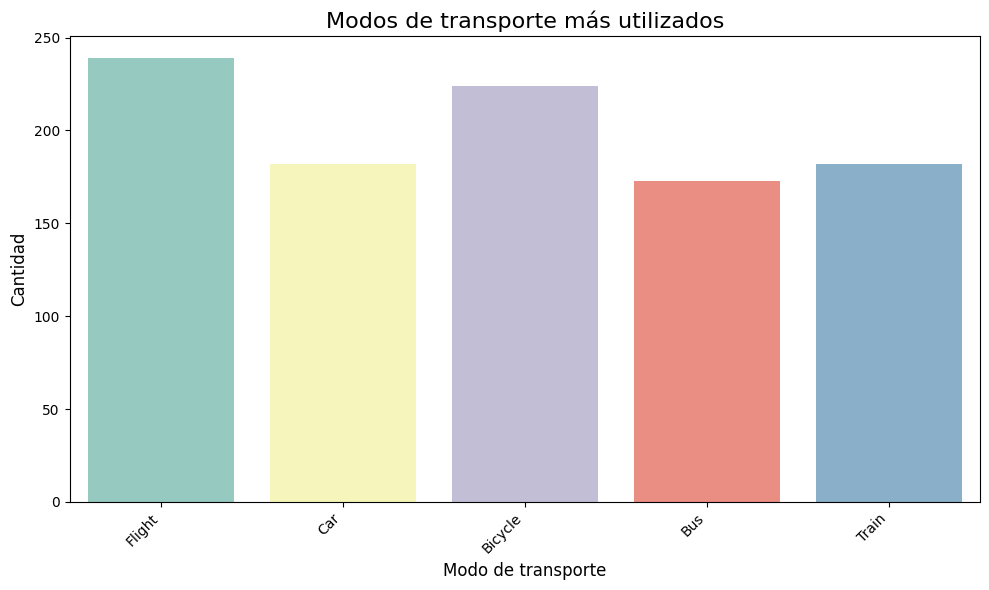

In [16]:
# 15. Gráfica 7: Modo de transporte más utilizado
plt.figure(figsize=(10, 6))
sns.countplot(
    data=df,
    x='Mode_of_Travel',
    hue='Mode_of_Travel',
    palette='Set3',
    legend=False
)
plt.title('Modos de transporte más utilizados', fontsize=16)
plt.xlabel('Modo de transporte', fontsize=12)
plt.ylabel('Cantidad', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
# Explicación: Muestra qué medios de transporte prefieren los turistas para sus viajes, indicando tendencias de movilidad.
# El avión es el medio más utilizado (239 viajes), seguido de bicicleta (224), auto y tren (182 cada uno), y bus (173). Sorprende el alto uso de la bicicleta, lo que puede indicar rutas cortas o turismo ecológico.

In [51]:
# 16. MAPA 5: Mapa por modo de transporte
transport_city = df.groupby(['City_Visited', 'Country_Visited', 'Mode_of_Travel']).size().reset_index(name='Count')
transport_city = transport_city.merge(city_coords_df, on=['City_Visited', 'Country_Visited'], how='left')

fig5 = px.scatter_geo(
    transport_city,
    lat='lat',
    lon='lon',
    color='Mode_of_Travel',
    size='Count',
    hover_name='City_Visited',
    title='Mapa de burbujas: Modo de transporte por ciudad',
    size_max=20,
    height=900,   # Más alto
    width=1600,   # Más ancho
    projection="natural earth"
)
fig5.update_layout(title_x=0.5)
fig5.update_geos(scope='europe')
fig5.show()
# Explicación: Visualiza qué modos de transporte se utilizan más frecuentemente para llegar a cada ciudad, revelando patrones de accesibilidad.
# En ciudades como Atenas y Ámsterdam se observa un uso equilibrado de todos los medios de transporte, mientras que en Berlín predomina el auto y en Barcelona el bus. El avión es común en la mayoría de las ciudades grandes.

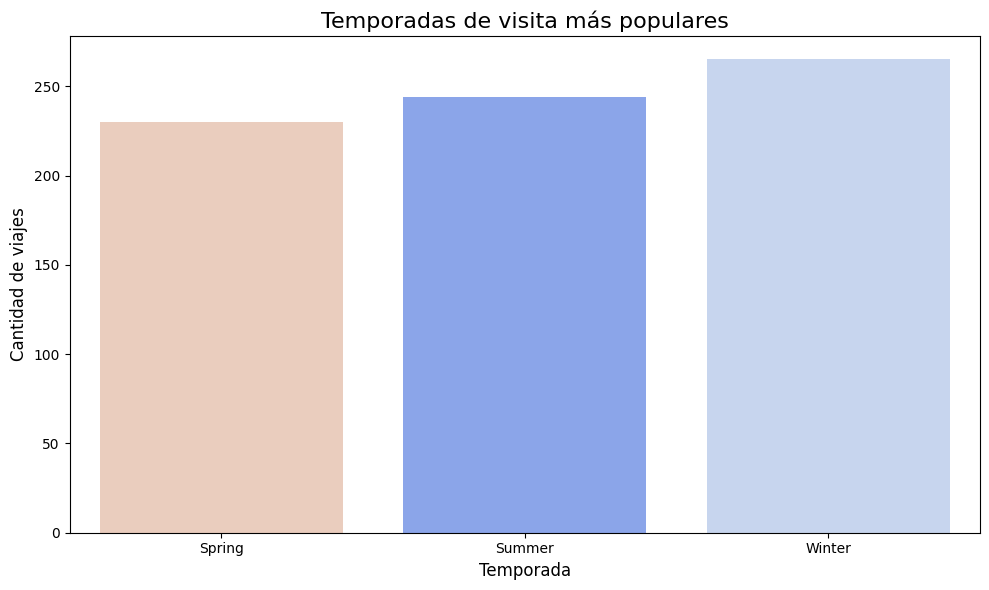

In [18]:
# 17. Gráfica 8: Temporada de visita
plt.figure(figsize=(10, 6))
sns.countplot(
    data=df,
    x='Season_of_Visit',
    hue='Season_of_Visit',
    order=['Spring', 'Summer', 'Winter'],
    palette='coolwarm',
    legend=False
)
plt.title('Temporadas de visita más populares', fontsize=16)
plt.xlabel('Temporada', fontsize=12)
plt.ylabel('Cantidad de viajes', fontsize=12)
plt.tight_layout()
plt.show()
# Explicación: Identifica en qué temporadas del año se concentran más los viajes turísticos, mostrando patrones estacionales.
# Las visitas se reparten casi por igual entre las cuatro estaciones, con un ligero predominio del invierno y el otoño. Esto sugiere que el turismo en Europa, según este dataset, no es marcadamente estacional.

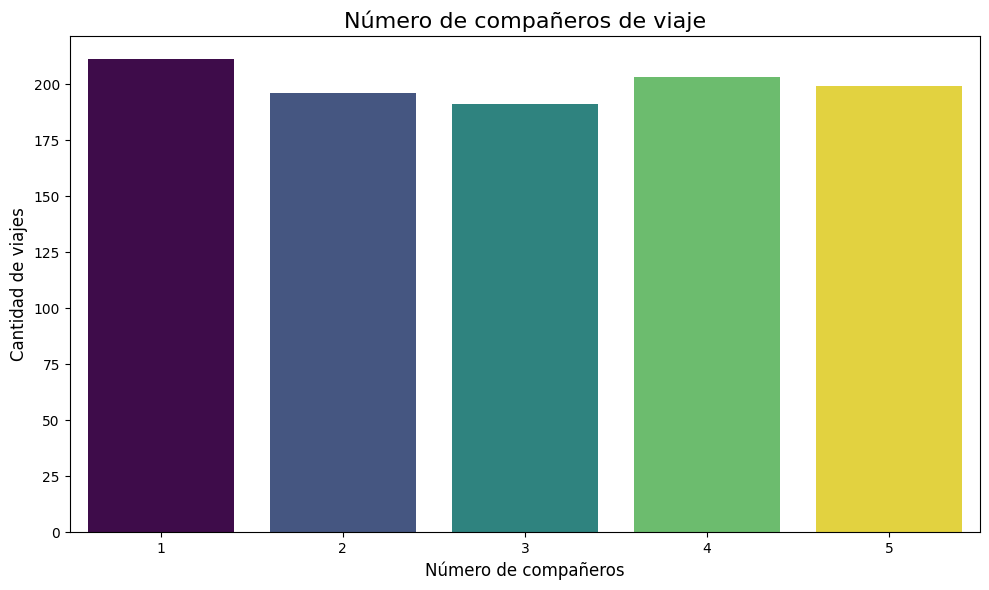

In [19]:
# 18. Gráfica 9: Número de compañeros de viaje
plt.figure(figsize=(10, 6))
sns.countplot(
    data=df,
    x='Number_of_Companions',
    hue='Number_of_Companions',
    palette='viridis',
    legend=False
)
plt.title('Número de compañeros de viaje', fontsize=16)
plt.xlabel('Número de compañeros', fontsize=12)
plt.ylabel('Cantidad de viajes', fontsize=12)
plt.tight_layout()
plt.show()
# Explicación: Muestra si los turistas prefieren viajar solos, en pareja o en grupos más grandes, indicando patrones sociales de viaje.
# La mayoría de los turistas viajan en grupos de 1 a 5 personas, con una distribución bastante uniforme: 1 (211), 2 (196), 3 (191), 4 (203), 5 (199). No hay un tamaño de grupo claramente dominante.